In [73]:
# https://www.kaggle.com/competitions/playground-series-s3e7/code
# Assignment in fulfillment of kaggle competition


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e7/sample_submission.csv
/kaggle/input/playground-series-s3e7/train.csv
/kaggle/input/playground-series-s3e7/test.csv


In [74]:
df = pd.read_csv('/kaggle/input/playground-series-s3e7/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e7/test.csv')

In [75]:
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [76]:
test_df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [77]:
df.dtypes

id                                        int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [78]:
# dropping id
id_df = pd.DataFrame()
id_df['id'] = df['id']
df = df.drop("id", axis=1)
test_df = test_df.drop("id", axis=1)
id_df

,id
0,0
1,1
2,2
3,3
4,4
...,...
42095,42095
42096,42096
42097,42097
42098,42098


In [79]:
# splitting dataset into two parts for better visualization of correlation matrix
sample1 =df.iloc[: , 1 : 10].copy()
sample1['booking_status'] = df['booking_status']
sample2 =df.iloc[: , 11 : 19].copy()
sample2['booking_status'] = df['booking_status']

<AxesSubplot:>

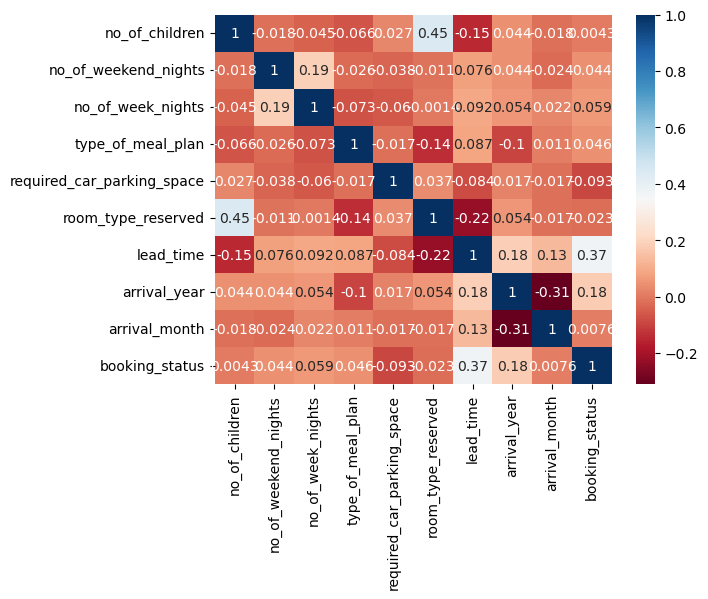

In [80]:
sns.heatmap(sample1.corr(), annot = True, cmap = 'RdBu')

In [81]:
df.drop(['arrival_date', 'arrival_month', 'no_of_week_nights', 'type_of_meal_plan'], axis=1)
test_df.drop(['arrival_date', 'arrival_month', 'no_of_week_nights', 'type_of_meal_plan'], axis=1)

,no_of_adults,no_of_children,no_of_weekend_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,0,1,111,2018,1,0,0,0,115.60,2
1,2,0,0,0,0,22,2017,0,0,0,0,85.00,0
2,2,2,0,0,3,18,2018,1,0,0,0,240.00,1
3,2,0,0,0,0,88,2018,0,0,0,0,80.75,0
4,1,0,0,0,0,7,2018,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,2,0,1,0,0,315,2018,1,0,0,0,160.00,0
28064,2,0,2,0,0,81,2018,0,0,0,0,65.00,1
28065,2,0,1,0,0,40,2018,0,0,0,0,85.00,0
28066,3,0,0,0,1,4,2018,1,0,0,0,162.75,0


<AxesSubplot:>

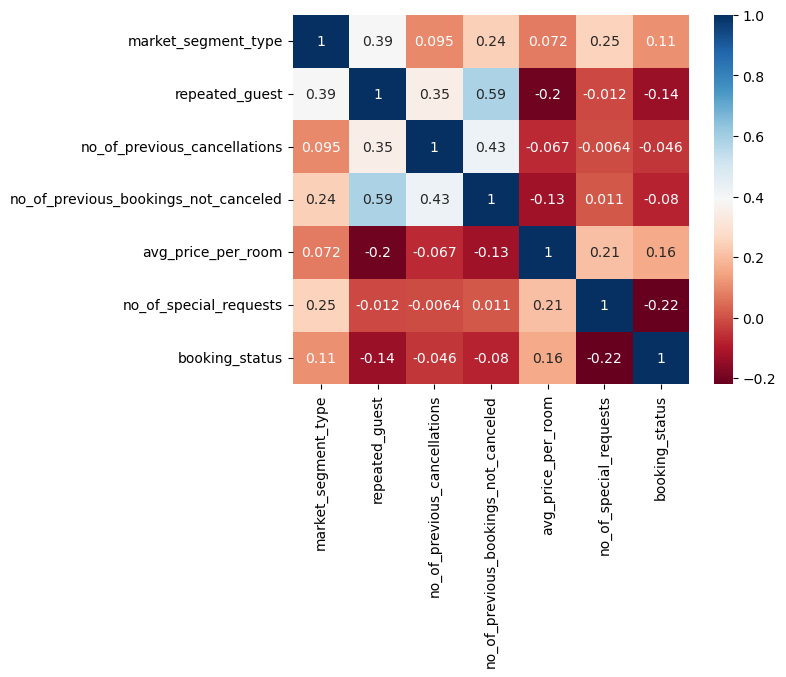

In [82]:
sns.heatmap(sample2.corr(), annot = True, cmap = 'RdBu')

In [83]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [84]:
# Splitting features and target
y= df['booking_status']
x= df.drop('booking_status', axis=1)
# test_y= test_df['booking_status']
# test_x= test_df.drop('booking_status', axis=1)
# inner join to handle new columns in test
# final_train, final_test = x.align(test_df, join='inner', axis=1) 

In [85]:
# Apply standard scaler
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scalar.fit(x)
sc_data=scalar.transform(x)
sc_data

scalar.fit(test_df)
test_sc_data=scalar.transform(test_df)
test_sc_data

array([[ 2.06108734, -0.31496071,  0.12665165, ..., -0.1013363 ,
         0.297557  ,  1.85301007],
       [ 0.16091984, -0.31496071, -1.01199617, ..., -0.1013363 ,
        -0.53355163, -0.7452308 ],
       [ 0.16091984,  4.15662109, -1.01199617, ..., -0.1013363 ,
         3.67631235,  0.55388963],
       ...,
       [ 0.16091984, -0.31496071,  0.12665165, ..., -0.1013363 ,
        -0.53355163, -0.7452308 ],
       [ 2.06108734, -0.31496071, -1.01199617, ..., -0.1013363 ,
         1.57817046, -0.7452308 ],
       [ 0.16091984, -0.31496071,  1.26529947, ..., -0.1013363 ,
        -0.55229231, -0.7452308 ]])

In [86]:
# Testing training dataset
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

In [87]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)


In [88]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [89]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.772209026128266

In [90]:
# Accuracy for full training datset
full_pred =logreg.predict(x)
metrics.accuracy_score(y, full_pred)

0.7644418052256532

In [91]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(sc_data)
x_pca = pca.transform(sc_data)

pca.fit(test_sc_data)
test_pca = pca.transform(test_sc_data)

x_pca.shape
test_pca.shape

(28068, 2)

In [92]:
metrics.accuracy_score(y_test, y_pred)

0.772209026128266

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='booking_status', ylabel='Density'>

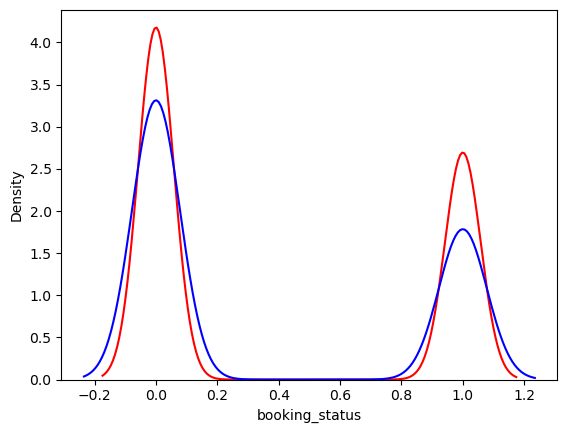

In [93]:
axis1=sns.distplot(y,hist=False,color='r',label='Actual Values')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Values',ax=axis1)

In [94]:
ans_df = pd.DataFrame()
ans_df['id'] = id_df['id']
ans_df['booking_status'] = full_pred
ans_df
ans_df.to_csv('submission.csv', index=False)